In [106]:
import matplotlib.pyplot as plt
import numpy as np
from casadi import *
from NMPC_quat import NMPC_quat
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
%autoreload
# Q = np.diag([120,
#              100,
#              100,
#              1,
#              1,
#              1,
#              1,
#              7e-1,
#              1.0,
#              4.0,
#              1e-5,
#              1e-5,
#              1e-5])

Q_position = np.diag([120,
             100,
             100])



R = np.diag([1, 1, 1, 1])* 0.06


In [108]:
x_init = np.array([0,0,0.2])
x_des = np.array([0.3,0.5,0.21])

N =100 # horizon length
T = 0.1 # time step
Tf = 30 # simulation time
method = "DMS"
# method = "DC"; degree = 2
store_prediction = True
nlp_opts_dms = { "ipopt.tol": 1e-3, "ipopt.max_iter": 100}


In [109]:
# initialise NMPC instance
dms_mpc = NMPC_quat(Q_position, R, N, T, Tf, method, store_prediction=store_prediction, nlpopts_dms=nlp_opts_dms)

dms_mpc.set_values(x_init, x_des)


RuntimeError: .../casadi/core/sparsity.cpp:414: Assertion "x.size2()==y.size1()" failed:
Matrix product with incompatible dimensions. Lhs is 1x13 and rhs is 3x3.

In [ ]:
print("Starting state : ",dms_mpc.x_init)
print("Desired state : ",dms_mpc.x_des)

In [ ]:
print("Solver : ",dms_mpc.solver)

In [ ]:
print("method : ",dms_mpc.method)

In [ ]:
print("Size of optimisation variable vector : ",len(dms_mpc.w0))

In [ ]:
dms_mpc.solve_open_loop()

In [ ]:
dms_mpc.X_mpc

In [ ]:
dms_mpc.U_mpc

In [ ]:
dms_mpc.thrust_list

In [ ]:
dms_mpc.L

In [ ]:
#print phi_list, theta list and psi_list as an array with 3 columnns and each row contains the values of phi, theta and psi at a time step
dms_mpc.control_list




In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from casadi import *
from NMPC_quat import NMPC_quat
# %load_ext autoreload
# solve the closed loop system
%autoreload
Q = np.diag([120,
             100,
             100,
             100,
             100,
             100,
             100,
             7e-1,
             1.0,
             4.0,
             1e-2,
             1e-2,
             1e-2])

# Q_position = np.diag([120,
#              100,
#              100])



R = np.diag([1, 1, 1, 1])*0.06
x_init = np.array([0,0,0.5])
x_des = np.array([0.5,0.5,0.5])
deviation_threshold = 0.01
N =30 # horizon length
T = 0.01 # time step
Tf = 3# simulation time
method = "DMS"
# method = "DC"; degree = 2
store_prediction = True
nlp_opts_dms = { "ipopt.tol": 1e-3, "ipopt.max_iter": 30, "ipopt.print_level": 0, "print_time": 0}

# initialise NMPC instance
dms_mpc = NMPC_quat(Q, R, N, T, Tf, method, store_prediction=store_prediction, nlpopts_dms=nlp_opts_dms)

dms_mpc.set_values(x_init, x_des)
print("Starting state : ",dms_mpc.initial_guess_state)
print(dms_mpc.N_sim)
stable_counter = 0
for i in range(dms_mpc.N_sim):
    # print("Iteration : ",i)
    dms_mpc.solve_for_next_state()
    dms_mpc.extract_next_state(i)
    # print("current pose =", dms_mpc.X_opt_current[7:10])
    # print("Current quaternion = ", dms_mpc.X_opt_current[3:7])
    # print("Control = ", dms_mpc.U_opt_current)
    if dms_mpc.deviation_from_reference < deviation_threshold:
        print("stability counter = ", stable_counter)
        stable_counter += 1
        if stable_counter > 10:
            print("System is stable")
            print("System converged in " , i, " steps")
            print("Final state : ",dms_mpc.X_opt_current)
            break
    if i >  dms_mpc.N_sim - 1:
        print("System is unstable")
        break



In [ ]:
# plot the 3d trajectory
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_des[0], x_des[1], x_des[2], 'ro', label='Desired position', markersize=10)
ax.plot(dms_mpc.X_mpc[i,0], dms_mpc.X_mpc[i,1], dms_mpc.X_mpc[i,2], 'go', label='Final position')
ax.plot(x_init[0], x_init[1], x_init[2], 'bo', label='Initial position')
ax.plot(dms_mpc.X_mpc[:i,0], dms_mpc.X_mpc[:i,1], dms_mpc.X_mpc[:i,2],'yo')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend()
plt.show()



In [ ]:
#plot the controls
plt.figure()
plt.stairs(dms_mpc.U_mpc[:i,0], label="u1")
plt.stairs(dms_mpc.U_mpc[:i,1], label="u2")
plt.stairs(dms_mpc.U_mpc[:i,2], label="u3")
plt.stairs(dms_mpc.U_mpc[:i,3], label="u4")
plt.legend()
plt.savefig("control_for_y_mvmt.png")
plt.show()


In [ ]:
dms_mpc.control_list

In [ ]:
print(dms_mpc.X_mpc[:i,3:7])

In [31]:
import matplotlib.pyplot as plt
%load_ext autoreload
import numpy as np
from casadi import *
from NMPC_quat import NMPC_quat
# %load_ext autoreload
# solve the closed loop system
%autoreload
Q = np.diag([120,
             100,
             100,
             1,
             1,
             1,
             1,
             1,
             1.0,
             10.0,
             1e-2,
             1e-2,
             1e-2])

# Q_position = np.diag([120,
#              100,
#              100])



R = np.diag([1, 1, 1, 1])*10
x_init = np.array([0,0,0.2])
x_des = np.array([0.2,0.2,0.2])
deviation_threshold = 0.05
N =20# horizon length
T = 0.05 # time step
Tf = 5# simulation time
# method = "DMS"
method = "DC"; degree = 2
store_prediction = True
nlp_opts_dc = { "ipopt.tol": 1e-3, "ipopt.max_iter": 50, "ipopt.print_level": 0, "print_time": 0}

# initialise NMPC instance
dc_mpc = NMPC_quat(Q, R, N, T, Tf, method, store_prediction=store_prediction, nlpopts_dc = nlp_opts_dc, degree=degree)

dc_mpc.set_values(x_init, x_des)
print("Starting state : ",dc_mpc.initial_guess_state)
print(dc_mpc.N_sim)
print(dc_mpc.deviation_from_reference)
stable_counter = 0
for i in range(dc_mpc.N_sim):
    print("Iteration : ",i)
    dc_mpc.solve_for_next_state()
    dc_mpc.extract_next_state(i)
    print("current pose =", dc_mpc.X_opt_current)
    # print("Current quaternion = ", dc_mpc.X_opt_current[3:7])
    # print("Control = ", dc_mpc.U_opt_current)
    print(dc_mpc.deviation_from_reference)
    if dc_mpc.deviation_from_reference < deviation_threshold:
        print("stability counter = ", stable_counter)
        stable_counter += 1
        if stable_counter > 50:
            print("System is stable")
            print("System converged in " , i, " steps")
            print("Final state : ",dc_mpc.X_opt_current)
            break
    if i >  dc_mpc.N_sim - 1:
        print("System is unstable")
        break



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Starting state :  [0.0, 0.0, 0.2, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2000
None
Iteration :  0
current pose = [ 2.02909814e-02  2.02909778e-02  1.99999904e-01  9.99997548e-01
 -2.65767236e-04  2.65774697e-04 -4.14887256e-05  4.97877017e-06
  4.97916131e-06 -1.79088716e-03 -4.25228638e-01  4.25253634e-01
 -6.63839422e-02]
0.25414693388937465
Iteration :  1
current pose = [ 3.81787564e-02  3.81787545e-02  1.99999415e-01  9.99995979e-01
 -8.70159011e-04  8.70246186e-04 -1.17576931e-04  2.97521795e-05
  2.97555541e-05 -1.74588121e-03 -5.42446713e-01  5.42524371e-01
 -5.53780777e-02]
0.22884979874290734
Iteration :  2
current pose = [ 5.40998953e-02  5.40998952e-02  1.99999580e-01  9.99993844e-01
 -1.54189924e-03  1.54215482e-03 -1.79211258e-04  8.58340940e-05
  8.58185269e-05 -1.66835045e-03 -5.33031614e-01  5.33133873e-01
 -4.32525074e-02]
0.20633390688845568
Iteration :  3
current pose =

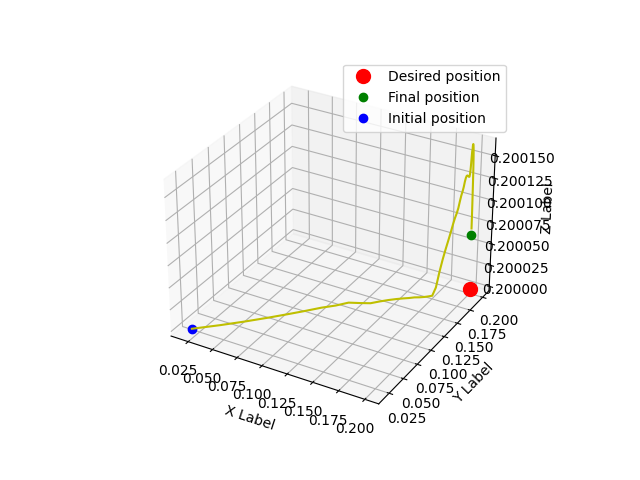

In [32]:
# plot the 3d trajectory
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_des[0], x_des[1], x_des[2], 'ro', label='Desired position', markersize=10)
ax.plot(dc_mpc.X_mpc[i,0], dc_mpc.X_mpc[i,1], dc_mpc.X_mpc[i,2], 'go', label='Final position')
ax.plot(dc_mpc.X_mpc[0,0], dc_mpc.X_mpc[0,1], dc_mpc.X_mpc[0,2], 'bo', label='Initial position')
ax.plot(dc_mpc.X_mpc[:i,0], dc_mpc.X_mpc[:i,1], dc_mpc.X_mpc[:i,2],'y')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend()
plt.show()



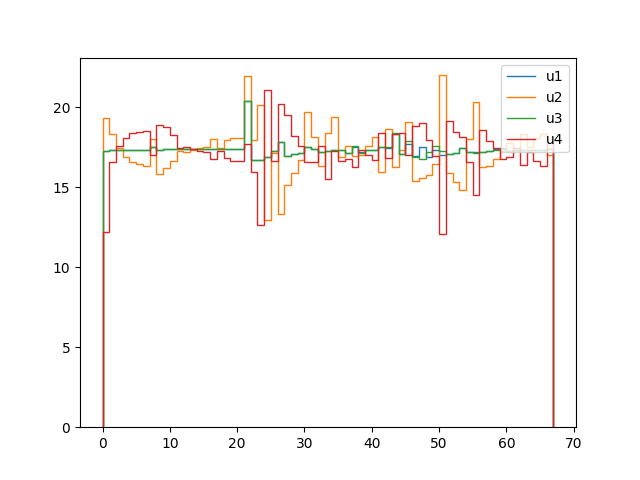

In [33]:
#plot the controls
plt.figure()
plt.stairs(dc_mpc.U_mpc[:i,0], label="u1")
plt.stairs(dc_mpc.U_mpc[:i,1], label="u2")
plt.stairs(dc_mpc.U_mpc[:i,2], label="u3")
plt.stairs(dc_mpc.U_mpc[:i,3], label="u4")
plt.legend()
plt.show()


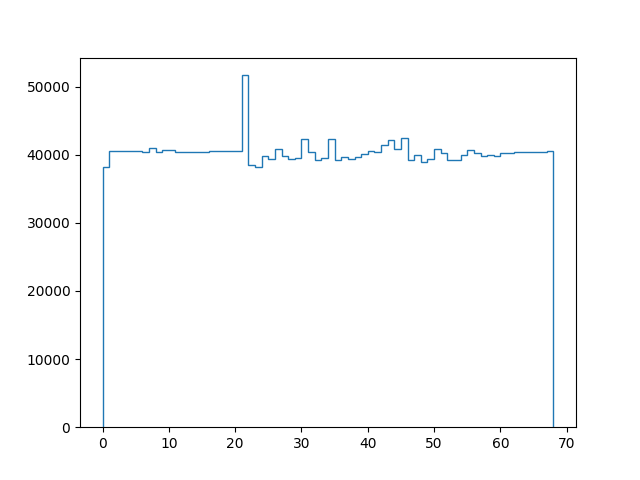

In [34]:
#plot thrust values
plt.figure()
plt.stairs(dc_mpc.thrust_list)

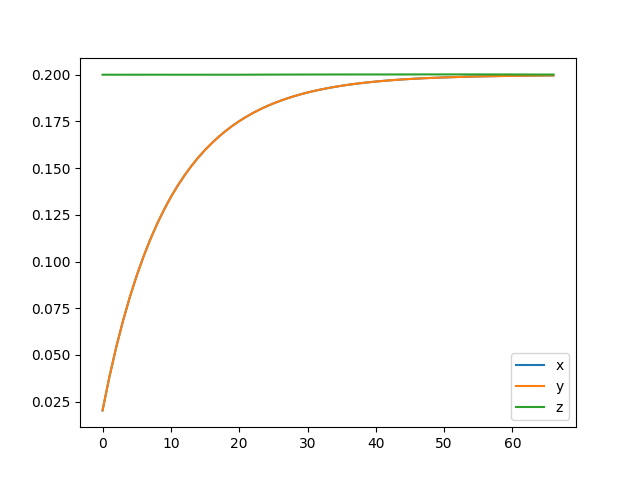

In [35]:
plt.figure()
plt.plot(dc_mpc.X_mpc[:i,0], label="x")
plt.plot(dc_mpc.X_mpc[:i,1], label="y")
plt.plot(dc_mpc.X_mpc[:i,2], label="z")
plt.legend()
plt.show()

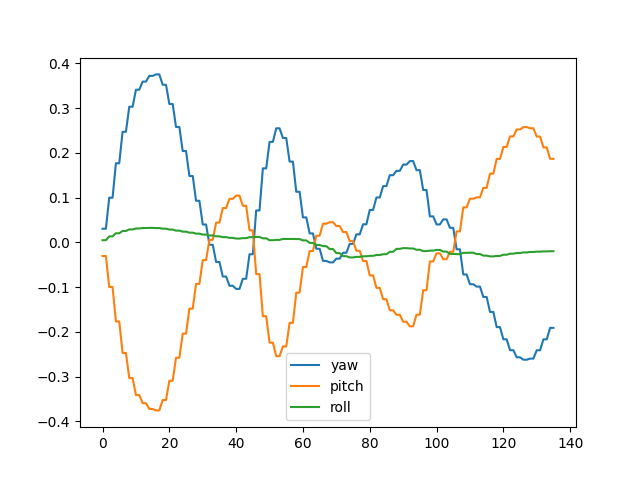

In [36]:
plt.figure()
plt.plot(dc_mpc.phi_list, label="yaw")
plt.plot(dc_mpc.theta_list, label="pitch")
plt.plot(dc_mpc.psi_list, label="roll")
plt.legend()
plt.show()

In [37]:
dc_mpc.control_list

[[-0.030453639388939045,
  -0.030456727107665317,
  -24.36380631255022,
  38136.3969385793],
 [-0.09970225175470195,
  -0.09973424047419352,
  -31.079907267749316,
  40499.70827016216],
 [-0.1766596590337273,
  -0.17674878202655792,
  -30.540461834733993,
  40539.59072589039],
 [-0.24708614452727576,
  -0.24724510784542397,
  -25.859436407350618,
  40542.32157351221],
 [-0.30311490677881886,
  -0.30334027348332915,
  -19.021004741883516,
  40525.0246686962],
 [-0.3410727033902593,
  -0.34134863613652494,
  -11.397441737400358,
  40495.43092448729],
 [-0.35924180654301024,
  -0.35954401197334407,
  -3.1823017102931033,
  40461.98970089038],
 [-0.3720513917596405,
  -0.37235203140050493,
  -7.107381014409435,
  40947.64333001607],
 [-0.3753151087018621,
  -0.3755884697247099,
  4.4584258746375856,
  40435.73076808125],
 [-0.35213114175558513,
  -0.3523496756620852,
  14.098203318784329,
  40752.55405545034],
 [-0.309207445861238,
  -0.30934648884266747,
  20.25745543767737,
  40632.30820

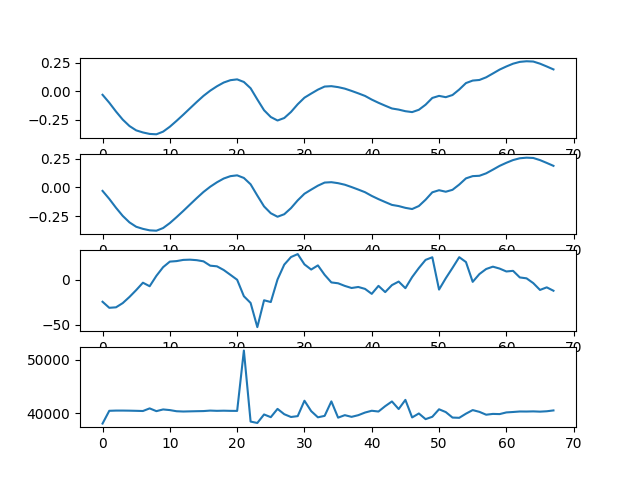

In [43]:
roll = [i[0] for i in dc_mpc.control_list]
pitch = [i[1] for i in dc_mpc.control_list]
yaw_rate = [i[2] for i in dc_mpc.control_list]
thrust = [i[3] for i in dc_mpc.control_list]

plt.figure()
plt.subplot(4,1,1)
plt.plot(roll)
plt.subplot(4,1,2)
plt.plot(pitch)
plt.subplot(4,1,3)
plt.plot(yaw_rate)
plt.subplot(4,1,4)
plt.plot(thrust)

plt.show()


